<h1 align="center">Hotel booking demand prediction - Dự đoán nhu cầu đặt phòng khách sạn</h1>

> Trong kinh doanh khách sạn, vấn đề đặt và hủy phòng luôn là một trong những bài toán luôn được quan tâm đối với người kinh doanh. Để nghiên cứu các yếu tố ảnh hưởng đến việc đặt phòng của khách hàng, bộ dữ liệu "hotel booking demand" cho biết thông tin về việc đặt phòng của 2 loại khách sạn (City Hotel và Resort Hotel) bao gồm thời gian đặt phòng, thời gian ở, số lượng người lớn, số lượng trẻ em,...
- Bộ dữ liệu được lấy từ Kaggle: <a href="https://www.kaggle.com/code/marcuswingen/eda-of-bookings-and-ml-to-predict-cancelations">Kaggle/Hotel_booking_demand</a> <br>
- Nguồn mô tả dữ liệu: <a href="https://www.sciencedirect.com/science/article/pii/S2352340918315191">source</a> <br>

## Table of Contents  
1. [Khai báo thư viện và đọc dữ liệu từ file](#1)     
    1.1. [Khai báo các thư viện cần thiết](#1.1) <br> 
    1.2. [Giải thích thuộc tính](#1.2) 
2. [Làm sạch dữ liệu và chia tập dữ liệu (train và test)](#2) <br>
    2.1. [Xoá dữ liệu bị duplicated (nếu có)](#2.1)<br>
    2.2. [Xử lý missing value](#2.2) <br>
    2.3. [Xoá các quan sát không có ý nghĩa](#2.3)<br>
    2.4. [Chia tập train và tập test](#2.4) <br>
3. [Exploratory Data Analysis - Phân tích dữ liệu khám phá](#3)<br>
    3.1 [Khách đa phần đến từ đâu ?](#3.1)<br>
    3.2 [Giá phòng trung bình mỗi khách phải trả cho một đêm ?](#3.2) <br>
    3.3 [Giá phòng mỗi đêm thay đổi như thế nào trong năm ?](#3.3)<br>
    3.4 [Thời điểm khách có nhu cầu đặt phòng nhiều trong năm ?](#3.4)<br>
    3.5 [Khách thường cư trú khách sạn trong bao lâu ?](#3.5)<br>
    3.6 [Phân khúc thị trường đặt phòng](#3.6)<br>
    3.7 [Phần trăm phòng bị hủy](#3.7)<br>
    3.8 [Thời điểm bị huỷ đặt phòng nhiều nhất ?](#3.8)<br>
    3.9 [Quan sát phân phối của thuộc tính `lead_time` và `adr` dựa theo thuộc tính `is_canceled`](#3.9)<br>
4. [Data preprocessing - Tiền xử lý dữ liệu](#4)     
    4.1. [Xử lý dữ liệu outlier](#4.1) <br>
    4.2. [Feature engineering](#4.2) <br>
    4.3. [Encoding - Mã hoá các thuộc tính categorical](#4.3) <br>
5. [Huấn luyện mô hình và dự đoán](#5)     
    5.1. [Logistic Regression](#5.1) <br>
    5.2. [Decision Tree Classifier](#5.2) <br>
    5.3. [Random Forest Classifier](#5.3)


<a id='1'></a>
# 1. Khai báo thư viện và đọc dữ liệu từ file

<a id='1.1'></a>
## 1.1 Khai báo các thư viện cần thiết 

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
hotel_booking = pd.read_csv("data/hotel_bookings.csv")
hotel_booking.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
hotel_booking.shape

(119390, 32)

<a id='1.2'></a>
## 1.2 Giải thích các thuộc tính

In [5]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Thuộc tính**

• `hotel`: phân loại khách sạn bao gồm resort hotel và city hotel.

• `is_canceled`: trạng thái đặt phòng.

• `lead_time`: khoảng thời gian kể từ lúc đặt và nhận phòng.

• `arrival_date`: ngày đến bao gồm, ngày (number_of_month), tháng (_month), năm
(_year), tuần (_week,_number).

• `stays_in_weekend_night`: số đêm ở lại vào cuối tuần của khách hàng.

• `stays_in_week_night` : số đêm ở lại trong các ngày thường của khách hàng.

• `is_repeated_guest`: kiểm tra khách hàng có bị trùng tên không.

• `previous_cancellations`: số lần hủy phòng của khách hàng ( không tính hiện tại).

• `previous_bookings_not_canceled`: số lần nhận phòng của khách hàng ( không tính
hiện tại).

• `reservation_status`: trạng thái của phòng (Canceled: đã huỷ, Check-Out: khách hàng
đã checkin nhưng đã rời đi, No-Show: đặt nhưng ko nhận phòng).

• `reservation_status_date`: ngày gần nhất cập nhật trạng thái của phòng cuối cùng
được thiết lập.

• `market_segment`: phân khúc thị trường. (“TA”: Đại lý Du lịch, “TO”: Nhà điều hành
Tour.)

• `adults`: số lượng người lớn.

• `babies`: số lượng trẻ sơ sinh.

• `children`: số lượng trẻ em.

• `meal`: loại bữa ăn đã đặt( Underfined/SC: không đặt, BB: phục vụ ăn uống tại phòng, HB:
2 bữa tùy chọn, FB: đầy đủ).

• `country`: quốc tịch.

• `distribution_channel`: kênh phân phối.

• `assigned_room_type`: loại phòng khách sạn phân phối.

• `booking_changes`: số lượng thay đổi phòng đặt.

• `deposit_type`: hình thức đặt cọc.

• `agent`: ID đại lý nhận đặt phòng.

• `company`: ID công ty chịu trách nhiệm cho đại lý đặt phòng.

• `days_in_waiting_list`: số ngày đợi xác nhận đặt phòng từ khách hàng.

• `customer_type`: loại khách hàng.

• `adr`: giá phòng phải trả cho mỗi lần booking (chưa chia cho đầu người, bao gồm người lớn và trẻ em không tính trẻ sơ sinh).

• `required_car_parking_spaces`: số lượng khu vực đổ xe người đặt yêu cầu.

• `total_of_special_request`: số yêu cầu đặc biệt của người đặt.

<a id='2'></a>
# 2. Làm sạch dữ liệu và chia tập dữ liệu (train và test)

<a id='2.1'></a>
## 2.1 Xoá dữ liệu bị duplicated (nếu có)

In [6]:
hotel_booking = hotel_booking.drop_duplicates()
hotel_booking.shape

(87396, 32)

- **Dữ liệu sau khi xoá `duplicated` từ `119390` còn `87396` quan sát.** <br>

In [7]:
hotel_booking

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [8]:
hotel_booking.groupby(['is_canceled', 'market_segment'], as_index=False)['adr'].sum()\
                    .sort_values(['is_canceled','adr'],ascending=False)

is_canceled market_segment         adr
13            1      Online TA  2273368.05
10            1         Direct   220064.48
12            1  Offline TA/TO   189131.65
11            1         Groups   101682.23
9             1      Corporate    40527.00
7             1       Aviation     4524.50
8             1  Complementary      155.83
14            1      Undefined       30.00
6             0      Online TA  3826413.92
3             0         Direct  1156039.10
5             0  Offline TA/TO   946491.20
4             0         Groups   268297.06
2             0      Corporate   246526.05
0             0       Aviation    18214.18
1             0  Complementary     1984.74

<a id='2.2'></a>
## 2.2 Xử lý missing value

In [9]:
def display_missing(df):
    for col in df.columns:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"{col:} {missing_count} missing values, {missing_count*100/df.shape[0]:.3f}%. ")

display_missing(hotel_booking)

children 4 missing values, 0.005%. 
country 452 missing values, 0.517%. 
agent 12193 missing values, 13.951%. 
company 82137 missing values, 93.983%. 


### Xoá cột `company` vì số lượng giá trị `na` quá lớn

In [10]:
hotel_booking = hotel_booking.drop(columns=["company"])

In [11]:
hotel_booking.shape

(87396, 31)

### Điền các dòng có giá trị `na` ở cột `children` và `country`
- **Ta sẽ điền missing bằng giá trị xuất hiện nhiều nhất tương ứng ở các cột `children` và `country` trong tập dữ liệu.**

In [12]:
hotel_booking[['children', 'country']] = hotel_booking[['children', 'country']].apply(lambda x: x.fillna(x.value_counts().index[0]))

<a id='2.3'></a>
## 2.3 Xoá các quan sát không có ý nghĩa
- **Thuộc tính `adults` không thể có giá trị là 0. Vì bài toán đang giải quyết liên quan đến booking thì việc booking sẽ  phải có người lớn tham gia.**

In [13]:
hotel_booking = hotel_booking[~(hotel_booking['adults'] == 0)]

<a id='2.4'></a>
## 2.4 Chia tập train và tập test
- **Để tránh việc chúng ta quan sát và phân tích đến tập test thì ta sẽ chia tập train và test trước khi làm xử dữ liệu và phân tích. Ta chỉ phân tích dựa trên tập train**

In [14]:
# Tách thuộc tính cần dự đoán 'is_canceled'
df_input = hotel_booking.drop(columns='is_canceled')
df_output = hotel_booking['is_canceled']

In [15]:
df_output.value_counts().to_frame()

is_canceled
0        63083
1        23928

In [16]:
train_input, test_input, train_output, test_output = train_test_split(
    df_input,
    df_output,
    test_size=0.3,
    stratify=df_output,
    random_state=0
)

In [17]:
train_input.shape

(60907, 30)

In [18]:
test_input.shape

(26104, 30)

<a id='3'></a>
# 3. Exploratory Data Analysis - Phân tích dữ liệu khám phá

In [19]:
train_input_concat = pd.concat([train_input, train_output], axis=1)
train_input_concat.shape

(60907, 31)

<a id='3.1'></a>
## 3.1 Khách đa phần đến từ đâu ?

In [20]:
# get number of acutal guests by country
country_data = pd.DataFrame(train_input_concat.loc[train_input_concat["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

print('numbers country: ', len(train_input_concat['country'].unique()))

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

numbers country:  165


**Mọi người đến từ khắp nơi trên thế giới. Tuy nhiên, số lượng người đến từ Bồ Đào Nha và các nước ở Châu Âu chiếm nhiều nhất (PRT - Bồ Đào Nha: 28%, GBR - Anh: 13%, FRA - Pháp: 11%...)**

<a id='3.2'></a>
## 3.2 Giá phòng trung bình mỗi khách phải trả cho một đêm ?
- Cả 2 loại `city hotel` và `resort hotel` đều có các loại phòng khác nhau, yếu tố thời điểm đặt phòng cũng rất quan trọng  nên có sự khác nhau khá nhiều ở giá phòng.
- Không có thông tin về loại tiền tệ được cung cấp, nhưng nhìn vào số lượng khách đặt phòng đa số đến từ các nước Châu Âu nên khả năng cao EURO là đồng tiền được sử dụng.  

### Ta phân loại ra 2 loại khách sạn: `Resort Hotel` và ` City Hotel` chưa huỷ booking

In [21]:
rh = train_input_concat.loc[(train_input_concat["hotel"] == "Resort Hotel") & (train_input_concat["is_canceled"] == 0)]
ch = train_input_concat.loc[(train_input_concat["hotel"] == "City Hotel") & (train_input_concat["is_canceled"] == 0)]

In [22]:
# Tính số tiền mỗi người phải trả bao gồm người lớn và trẻ em, không tính trẻ sơ sinh.
rh["adr_pp"] = rh["adr"] / (rh["adults"] + rh["children"])
ch["adr_pp"] = ch["adr"] / (ch["adults"] + ch["children"])

In [23]:
print("""Từ dữ liệu về việc đặt phòng, bao gồm loại phòng, bữa ăn thì giá trung bình là:
Resort hotel: {:.2f} (EUR) cho mỗi người 1 đêm.
City hotel: {:.2f} (EUR) cho mỗi người 1 đêm"""
      .format(rh["adr_pp"].mean(), ch["adr_pp"].mean()))

Từ dữ liệu về việc đặt phòng, bao gồm loại phòng, bữa ăn thì giá trung bình là:
Resort hotel: 48.05 (EUR) cho mỗi người 1 đêm.
City hotel: 59.43 (EUR) cho mỗi người 1 đêm


<a id='3.3'></a>
## 3.3 Giá phòng mỗi đêm thay đổi như thế nào trong năm ?

In [24]:
# Chuẩn hóa giá phòng (adr):
train_input_concat["adr_pp"] = train_input_concat["adr"] / (train_input_concat["adults"] + train_input_concat["children"])
full_data_guests = train_input_concat.loc[train_input_concat["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")


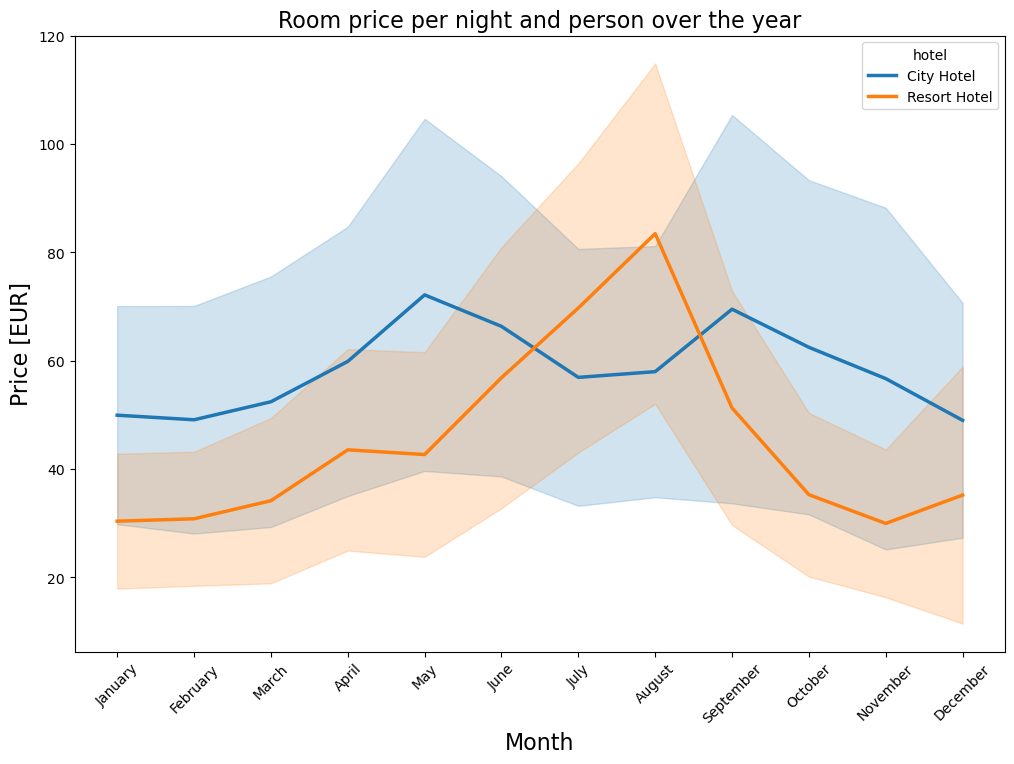

In [25]:
# grab data:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# Sắp xếp theo thứ tự tháng:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

**Nhận xét** : Từ đồ thị, ta thấy giá ở Resort hotel cao hơn xuyên suốt mùa hè và giá cả
ở City hotel thấp hơn và đắt nhất vào mùa xuân và mùa thu.

<a id='3.4'></a>
## 3.4 Thời điểm nhu cầu đặt phòng nhiều trong năm ?

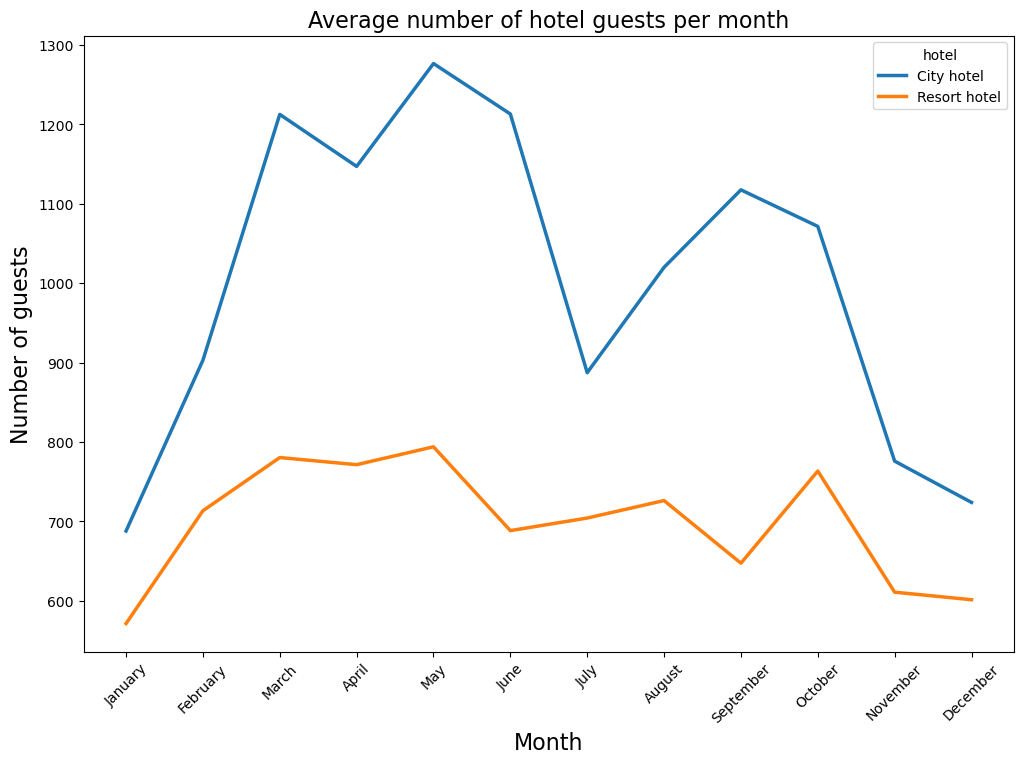

In [26]:
# Create a DateFrame with the relevant data:
resort_guests_monthly = rh.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = ch.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

Nhận xét :
- City hotel có nhiều khách đến ở vào mùa xuân và mùa thu. Tuy nhiên, tháng 7 và tháng 8 có khá ít khách
hơn mặc dù tiền phòng đã giảm.
- Resort hotel có lượng khách giảm sút từ tháng 6 đến tháng 9 cũng là thời điểm mà giá
phòng cao nhất.
-Cả 2 loại khách sạn đều có lượng khách khá ít trong xuyên suốt mùa đông

<a id='3.5'></a>
## 3.5 Khách thường cư trú khách sạn trong bao lâu ?

In [27]:
# Create a DateFrame with the relevant data:
rh["total_nights"] = rh["stays_in_weekend_nights"] + rh["stays_in_week_nights"]
ch["total_nights"] = ch["stays_in_weekend_nights"] + ch["stays_in_week_nights"]

num_nights_res = list(rh["total_nights"].value_counts().index)
num_bookings_res = list(rh["total_nights"].value_counts())
rel_bookings_res = rh["total_nights"].value_counts() / sum(num_bookings_res) * 100 # convert to percent

num_nights_cty = list(ch["total_nights"].value_counts().index)
num_bookings_cty = list(ch["total_nights"].value_counts())
rel_bookings_cty = ch["total_nights"].value_counts() / sum(num_bookings_cty) * 100 # convert to percent

res_nights = pd.DataFrame({"hotel": "Resort hotel",
                           "num_nights": num_nights_res,
                           "rel_num_bookings": rel_bookings_res})

cty_nights = pd.DataFrame({"hotel": "City hotel",
                           "num_nights": num_nights_cty,
                           "rel_num_bookings": rel_bookings_cty})

nights_data = pd.concat([res_nights, cty_nights], ignore_index=True)

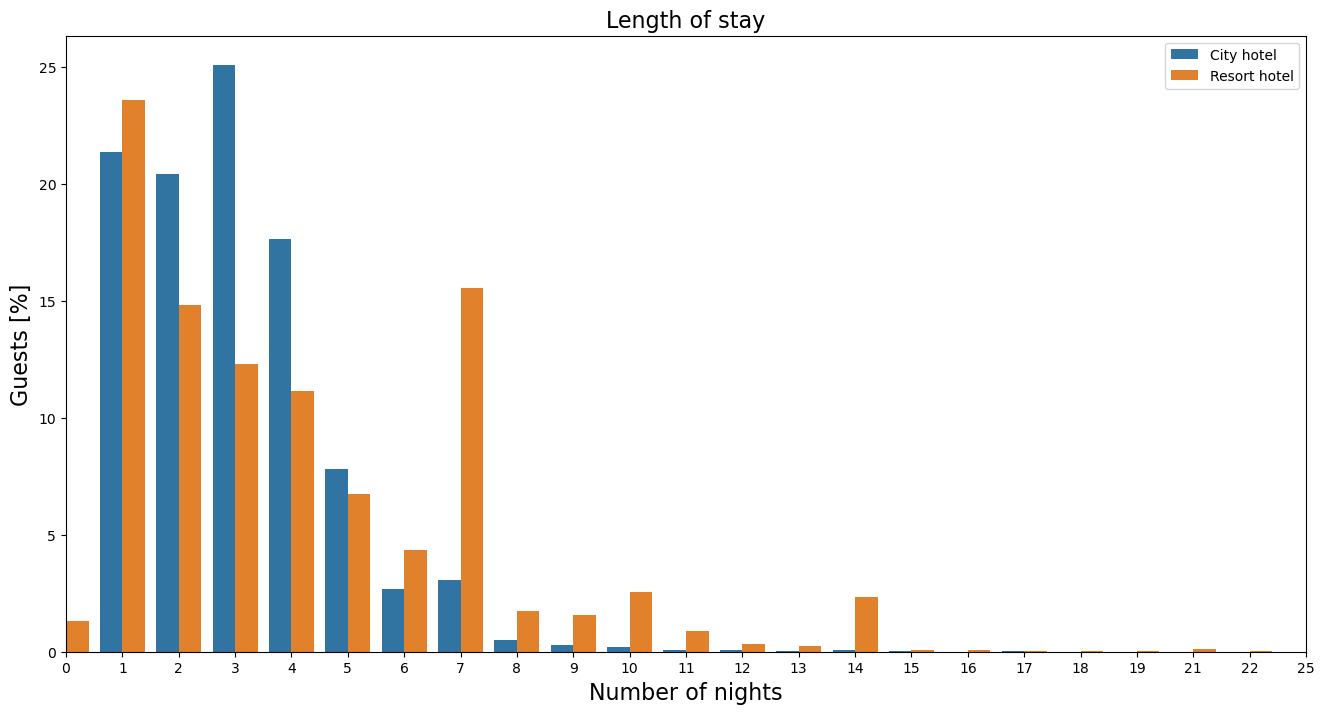

In [28]:
#show figure:
plt.figure(figsize=(16, 8))
sns.barplot(x = "num_nights", y = "rel_num_bookings", hue="hotel", data=nights_data,
            hue_order = ["City hotel", "Resort hotel"])
plt.title("Length of stay", fontsize=16)
plt.xlabel("Number of nights", fontsize=16)
plt.ylabel("Guests [%]", fontsize=16)
plt.legend(loc="upper right")
plt.xlim(0,22)
plt.show()

Nhận xét :
- Trung bình, khách đến ở City hotel trong 2.98 đêm , và 48 đêm là lâu nhất.
- Trung bình, khách đến ở Resort hotel trong 4.20 đêm, và 69 đêm là lâu nhất.
- Đối với City hotel, khách hàng thường ở từ 1 đến 4.
- Tương tự với Resort hotel, khách cũng thường xuyên đặt phòng ở từ 1 đến 4 đêm.

In [29]:
avg_nights_res = sum(list((res_nights["num_nights"] * (res_nights["rel_num_bookings"]/100)).values))
avg_nights_cty = sum(list((cty_nights["num_nights"] * (cty_nights["rel_num_bookings"]/100)).values))
print(f"Trung bình khách đến ở City hotel trong {avg_nights_cty:.2f} đêm , và {cty_nights['num_nights'].max()} là lâu nhất.")
print(f"Trung bình khách đến ở Resort hotel trong {avg_nights_res:.2f} đêm, và {res_nights['num_nights'].max()} là lâu nhất.")

Trung bình khách đến ở City hotel trong 2.98 đêm , và 34 là lâu nhất.
Trung bình khách đến ở Resort hotel trong 4.18 đêm, và 69 là lâu nhất.


<a id='3.6'></a>
## 3.6 Phân khúc thị trường đặt phòng

In [30]:
# total bookings per market segment (incl. canceled)
segments = train_input_concat["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

**Nhận xét** : người đặt thường có xu hướng đặt phòng online ở các đại lý du lịch.

<a id='3.7'></a>
## 3.7 Phần trăm phòng bị hủy 

In [31]:
# absolute cancelations:
total_cancelations = train_input_concat["is_canceled"].sum()
rh_cancelations = train_input_concat.loc[train_input_concat["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = train_input_concat.loc[train_input_concat["hotel"] == "City Hotel"]["is_canceled"].sum()

# as percent:
rel_cancel = total_cancelations / train_input_concat.shape[0] * 100
rh_rel_cancel = rh_cancelations / train_input_concat.loc[train_input_concat["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / train_input_concat.loc[train_input_concat["hotel"] == "City Hotel"].shape[0] * 100

print(f"Tổng số phòng bị hủy: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Số phòng Resort hotel bị hủy: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"Số phòng City hotel bị hủy: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Tổng số phòng bị hủy: 16,749 (27 %)
Số phòng Resort hotel bị hủy: 5,606 (24 %)
Số phòng City hotel bị hủy: 11,143 (30 %)


<a id='3.8'></a>
## 3.8 Thời điểm bị hủy đặt phòng nhiều nhất

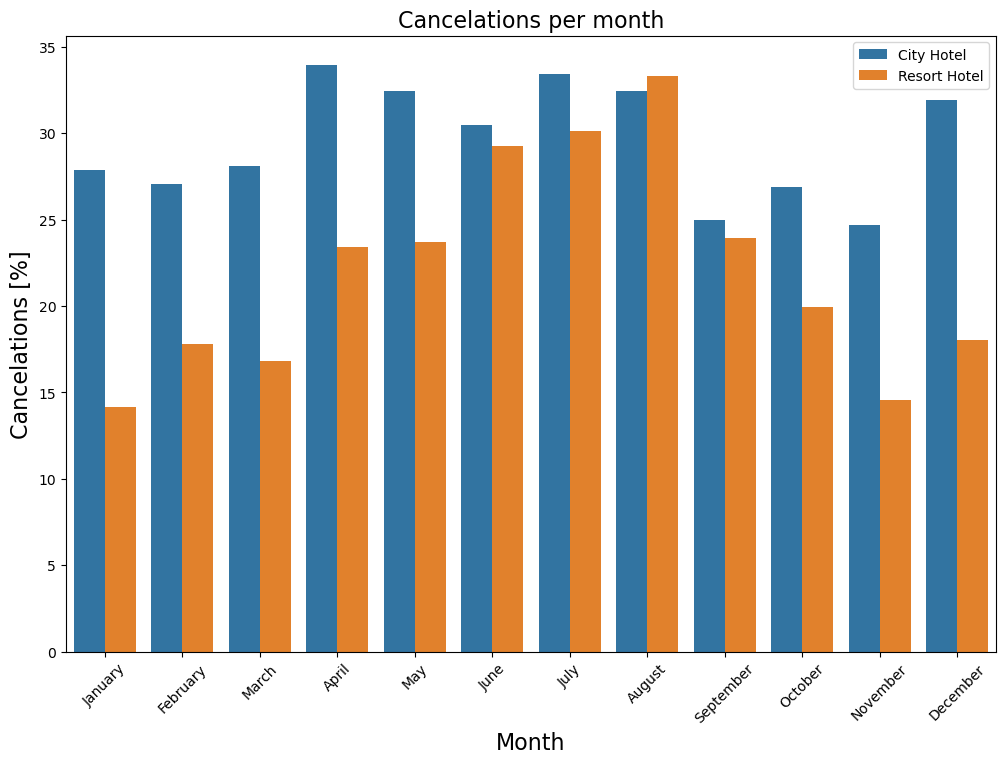

In [32]:
# Create a DateFrame with the relevant data:
res_book_per_month = train_input_concat.loc[(train_input_concat["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = train_input_concat.loc[(train_input_concat["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = train_input_concat.loc[(train_input_concat["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = train_input_concat.loc[(train_input_concat["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

**Nhận xét**:
- Đối với City hotel, số lượng phòng bị hủy xuyên suốt năm đều gần như nhau ở mỗi
tháng ( tầm 40% ).
- Đối với Resort hotel, số lượng hủy phòng cao nhất là vào mùa hè và thấp nhất là vào
mùa đông.

<a id='3.9'></a>
## 3.9 Quan sát phân phối của thuộc tính `lead_time` và `adr` dựa theo thuộc tính `is_canceled`

**Nhận xét**: với khoảng thời gian chờ từ ngày đặt đến ngày đến càng lớn thì khả năng huỷ booking sẽ cao hơn.

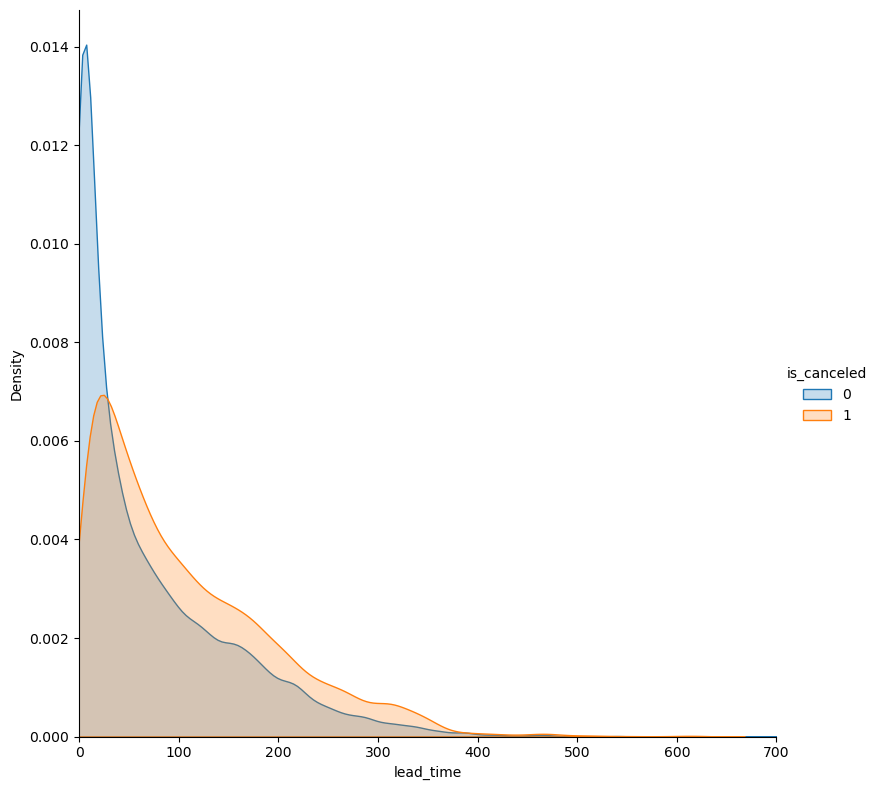

In [33]:
sns.FacetGrid(data=train_input_concat, hue = 'is_canceled',
             height = 8,
             xlim = (0,700)).map(sns.kdeplot, 'lead_time', shade = True).add_legend()

**Nhận xét:** khoảng thời gian chờ càng lâu (trên 50 ngày) thì khả năng huỷ đặt phòng cao hơn.

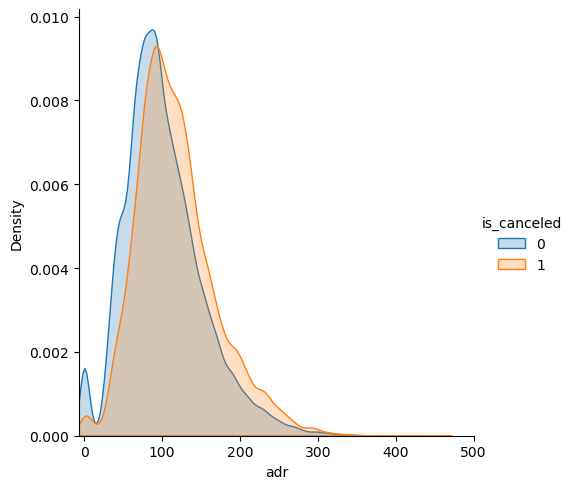

In [34]:
sns.FacetGrid(data=train_input_concat, hue = 'is_canceled',
             height = 5,
             xlim = (train_input_concat['adr'].min(),500))\
.map(sns.kdeplot, 'adr', shade = True)\
.add_legend()

<a id='4'></a>
# 4. Tiền xử lý dữ liệu

<a id='4.1'></a>
## 4.1 Xử lý dữ liệu outlier

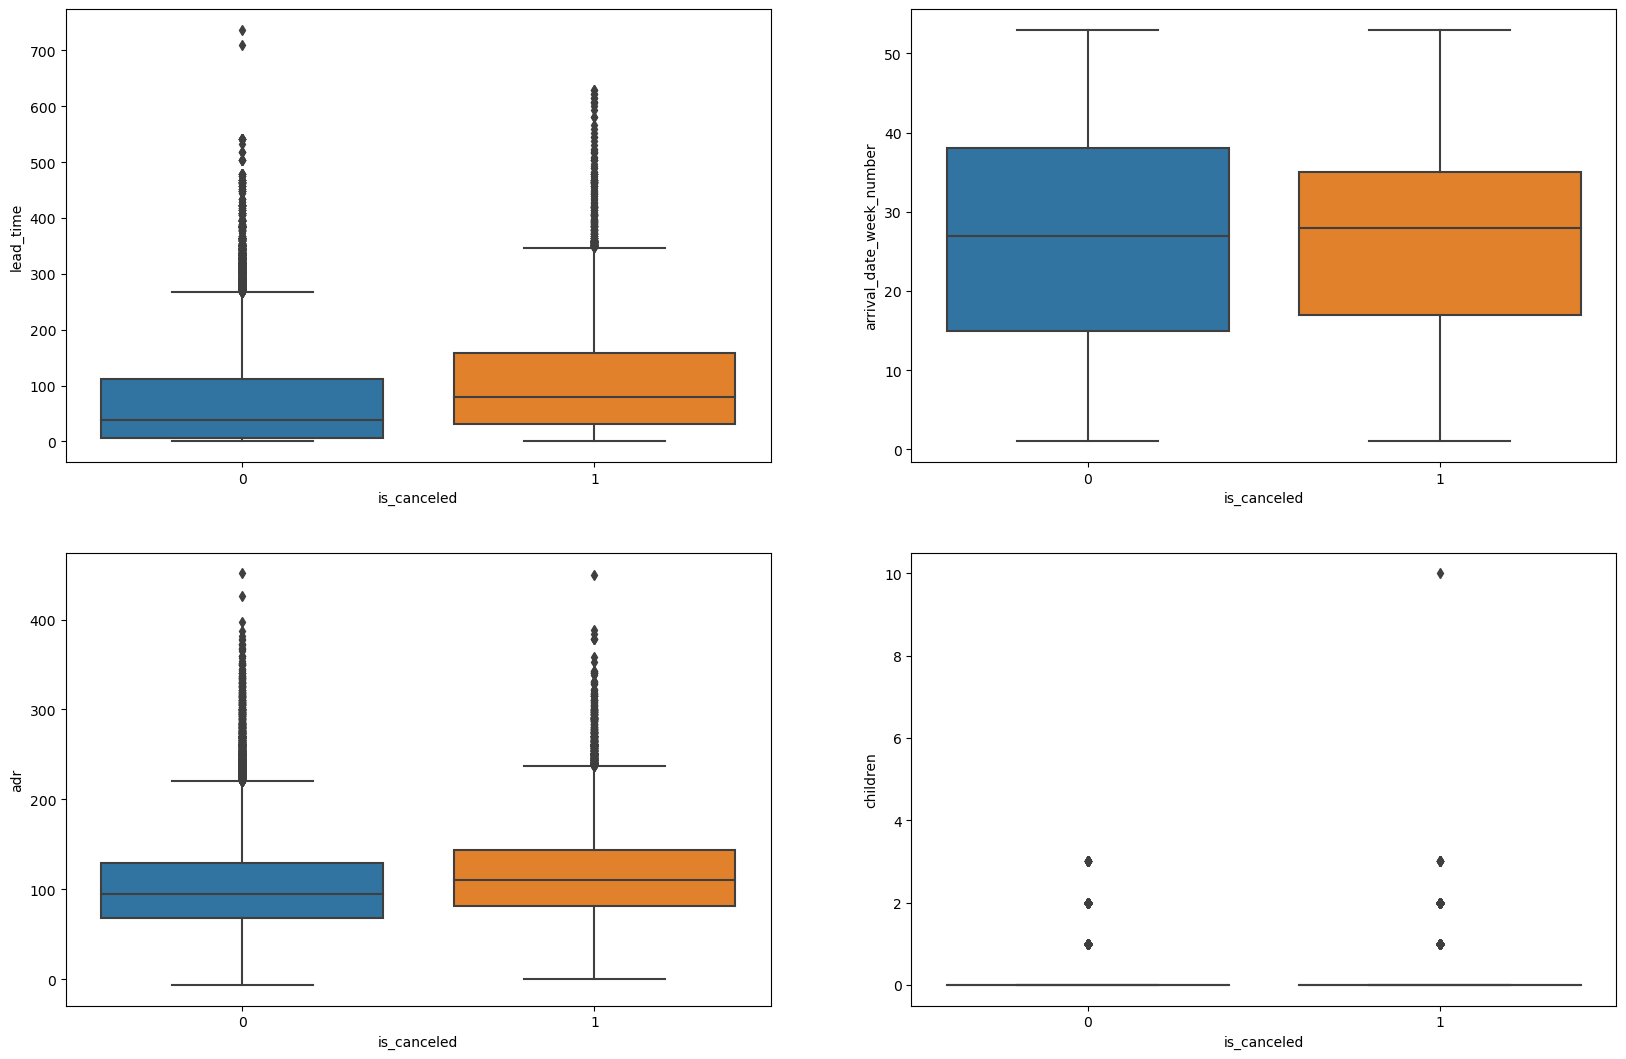

In [35]:
# Biểu đồ boxplot cho biết quan hệ giữa thuộc tính có kiểu numeric và thuộc tính 'hotel'
num_features = ['lead_time', 'arrival_date_week_number', 'adr', 'children']
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1
for feature in num_features:
    ax = plt.subplot(3,2,plotnumber)
    sns.boxplot(x='is_canceled', y= train_input_concat[feature], data=train_input_concat)
    plt.xlabel('is_canceled')
    plotnumber += 1
plt.show()

In [36]:
# Xoá các quan sát có kết quả 'is_canceled' là 0 mà giá trị 'lead_time' trên 500
filtr = (train_output != 0) & (train_input['lead_time'] > 500)
train_input = train_input[~filtr]
# Chỉ lấy các quan sát có số trẻ em số lượng ít hơn 10
train_input = train_input[train_input['children'] < 10]
# Bỏ qua các quan sát có giá trị 'adr' > 400
train_input = train_input[train_input['adr'] < 400]

train_output = train_output[train_input.index]
print(f"input: {train_input.shape}")

input: (60872, 30)


<a id='4.2'></a>
## 4.2 Feature engineering

### Xử lý với thuộc tính `previous_cancellations`

<Axes: xlabel='previous_cancellations', ylabel='count'>

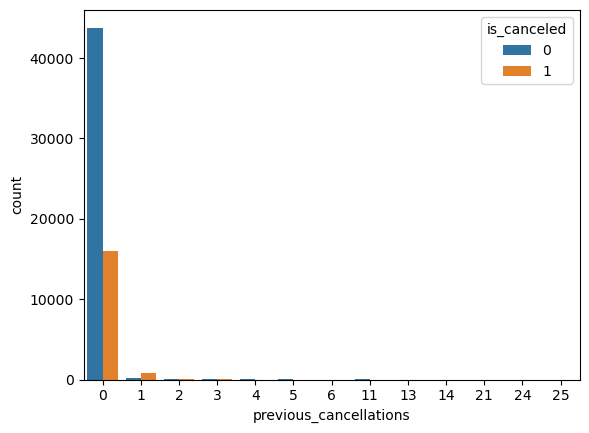

In [37]:
sns.countplot(x='previous_cancellations', data=train_input_concat, hue='is_canceled')

In [38]:
train_input_concat.groupby(['is_canceled', 'previous_cancellations'])['previous_cancellations'].count()

is_canceled  previous_cancellations
0            0                         43790
             1                           223
             2                            56
             3                            32
             4                            15
             5                            13
             6                            10
             11                           18
             13                            1
1            0                         15935
             1                           760
             2                            26
             3                            12
             4                             4
             5                             1
             6                             2
             11                            2
             13                            2
             14                            1
             21                            1
             24                            2
             25    

In [39]:
train_input_concat['prev_cancellations_cat'] = pd.cut(train_input_concat['previous_cancellations'],
                                                    bins=[0,1,2,12,27], labels=['0', '1', '2-11', '12-26'],
                                                    right=False)

In [40]:
train_input_concat.groupby(['is_canceled', 'prev_cancellations_cat'])['prev_cancellations_cat'].count()

is_canceled  prev_cancellations_cat
0            0                         43790
             1                           223
             2-11                        144
             12-26                         1
1            0                         15935
             1                           760
             2-11                         47
             12-26                         7
Name: prev_cancellations_cat, dtype: int64

<Axes: xlabel='prev_cancellations_cat', ylabel='count'>

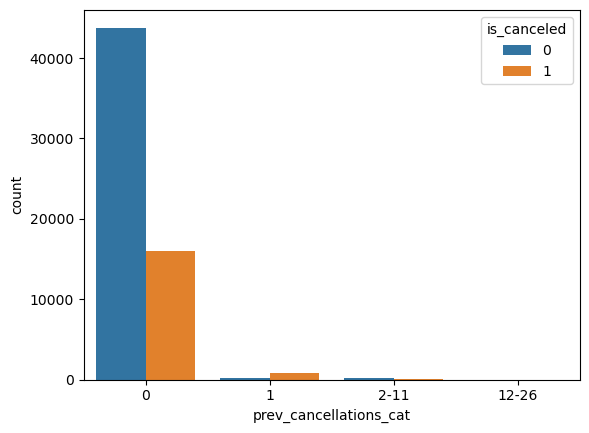

In [41]:
sns.countplot(x='prev_cancellations_cat', data=train_input_concat, hue='is_canceled')

In [42]:
train_input['prev_cancellations_cat'] = pd.cut(train_input['previous_cancellations'],
                                                    bins=[0,1,2,12,27], labels=['0', '1', '2-11', '12-26'],
                                                    right=False)
test_input['prev_cancellations_cat'] = pd.cut(test_input['previous_cancellations'],
                                                    bins=[0,1,2,12,27], labels=['0', '1', '2-11', '12-26'],
                                                    right=False)

### Xử lý với thuộc tính `required_car_parking_spaces`

<Axes: xlabel='required_car_parking_spaces', ylabel='count'>

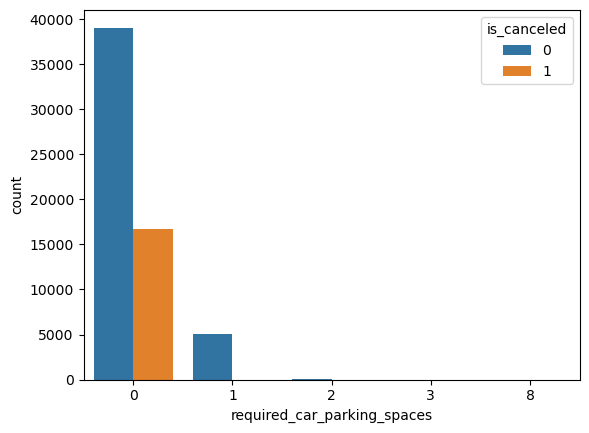

In [43]:
sns.countplot(x='required_car_parking_spaces', data=train_input_concat, hue='is_canceled')

In [44]:
train_input_concat.groupby(['is_canceled', 'required_car_parking_spaces'])['required_car_parking_spaces'].count()

is_canceled  required_car_parking_spaces
0            0                              39059
             1                               5076
             2                                 19
             3                                  3
             8                                  1
1            0                              16749
Name: required_car_parking_spaces, dtype: int64

**Nhận xét**: nếu người đặt yêu cầu nhiều chỗ trống để ô tô được đáp ứng thì khả năng họ sẽ không huỷ đặt chỗ.

In [45]:
train_input_concat['required_car_parking_spaces_cat'] = pd.cut(train_input_concat['required_car_parking_spaces'],
                                                    bins=[0,1,9], labels=['not_required', 'required'],
                                                    right=False)

<Axes: xlabel='required_car_parking_spaces_cat', ylabel='count'>

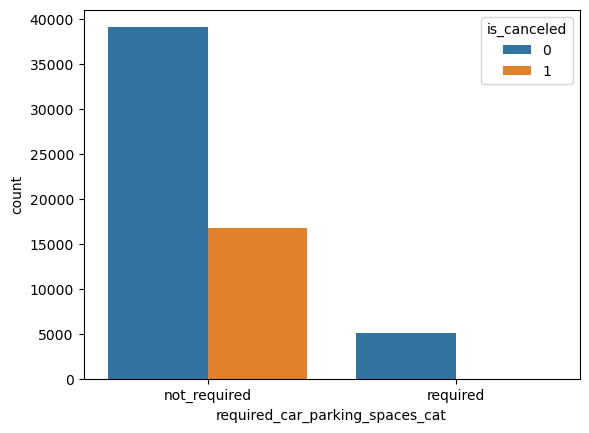

In [46]:
sns.countplot(x='required_car_parking_spaces_cat', data=train_input_concat, hue='is_canceled')

In [47]:
train_input['required_car_parking_spaces_cat'] = pd.cut(train_input['required_car_parking_spaces'],
                                                    bins=[0,1,9], labels=['not_required', 'required'],
                                                    right=False)
test_input['required_car_parking_spaces_cat'] = pd.cut(test_input['required_car_parking_spaces'],
                                                    bins=[0,1,9], labels=['not_required', 'required'],
                                                    right=False)

### Xử lý với thuộc tính `reservation_status_date` 
- Tạo ra các thuộc tính mới (`year`, `month`, `day`) từ thuộc tính `reservation_status_date`

In [48]:
train_input['reservation_status_date'] = pd.to_datetime(train_input['reservation_status_date'])
train_input['year'] = train_input['reservation_status_date'].dt.year
train_input['month'] = train_input['reservation_status_date'].dt.month
train_input['day'] = train_input['reservation_status_date'].dt.day

test_input['reservation_status_date'] = pd.to_datetime(test_input['reservation_status_date'])
test_input['year'] = test_input['reservation_status_date'].dt.year
test_input['month'] = test_input['reservation_status_date'].dt.month
test_input['day'] = test_input['reservation_status_date'].dt.day

<a id='4.3'></a>
## 4.3 Mã hoá các thuộc tính categorical

In [49]:
num_features = ['arrival_date_week_number', 'arrival_date_day_of_month','stays_in_weekend_nights'\
                , 'stays_in_week_nights', 'adults', 'children', 'babies'\
                , 'lead_time', 'adr', 'is_repeated_guest']
cat_features = ['hotel', 'meal', 'year', 'month', 'day'\
                , 'market_segment', 'distribution_channel', 'reserved_room_type'\
                ,'customer_type', 'deposit_type', 'prev_cancellations_cat', 'required_car_parking_spaces_cat']

feature_cols = num_features + cat_features
train_input = train_input[feature_cols]
test_input = test_input[feature_cols]

print(train_input.shape)
print(test_input.shape)

(60872, 22)
(26104, 22)


In [50]:
od_features = ['reserved_room_type', 'customer_type', 'deposit_type', 'market_segment', 'hotel', 'meal', 'year'\
             , 'distribution_channel', 'prev_cancellations_cat', 'required_car_parking_spaces_cat']
for col in od_features:
    train_input[col] = train_input[col].astype('category').cat.codes
    test_input[col] = test_input[col].astype('category').cat.codes

print(train_input.shape)
print(test_input.shape)

(60872, 22)
(26104, 22)


In [51]:
train_input.head()

arrival_date_week_number  arrival_date_day_of_month  \
16777                        35                         29   
32762                         5                          4   
23733                        18                         29   
38982                        31                          1   
71871                        28                         14   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
16777                        4                    10       2       0.0   
32762                        0                     1       2       0.0   
23733                        1                     2       2       0.0   
38982                        0                     4       2       0.0   
71871                        2                     2       2       0.0   

       babies  lead_time     adr  is_repeated_guest  ...  year  month  day  \
16777       0        239   77.78                  0  ...     1      9   12   
32762       0         12   45.00                  0  ...     3      2    5   
23733       0         13   83.33                  0  ...     2      5    2   
38982       0          9  193.40                  0  ...     3      8    5   
71871       0        152  143.10                  0  ...     3      2   27   

       market_segment  distribution_channel  reserved_room_type  \
16777               5                     3                   0   
32762               3                     1                   0   
23733               6                     3                   3   
38982               6                     3                   0   
71871               6                     3                   4   

       customer_type  deposit_type  prev_cancellations_cat  \
16777              0             0                       0   
32762              2             0                       0   
23733              2             0                       0   
38982              2             0                       0   
71871              2             0                       0   

       required_car_parking_spaces_cat  
16777                                0  
32762                                0  
23733                                0  
38982                                0  
71871                                0  

[5 rows x 22 columns]

<a id='5'></a>
# 5. Huấn luyện mô hình dự đoán

<a id='5.1'></a>
## 5.1 Logistic Regression

In [52]:
# Khởi tạo và huấn luyện mô hình
LogR_model = LogisticRegression()
LogR_model.fit(train_input, train_output)
# Dự đoán 
y_pred_LogR = LogR_model.predict(test_input)
# Xác định độ chính xác của mô hình
accuracy_LogG = accuracy_score(test_output, y_pred_LogR) 
print("Accuracy: %.2f%%" % (accuracy_LogG * 100.0))

Accuracy: 77.20%


Confusion matrix:
[[18313   612]
 [ 5339  1840]]


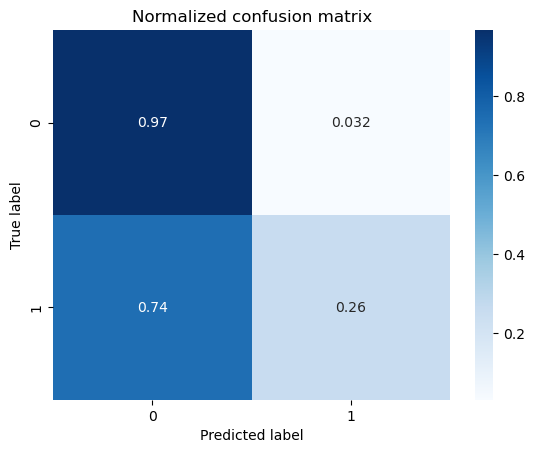

In [53]:
# confusion matrix
cnf_matrix_LogR = confusion_matrix(test_output, y_pred_LogR)
print('Confusion matrix:')
print(cnf_matrix_LogR)
# biểu đồ confusion matrix chuẩn hoá
normalized_cnf_matrix_LogR = cnf_matrix_LogR/cnf_matrix_LogR.sum(axis = 1, keepdims = True)
sns.heatmap(pd.DataFrame(normalized_cnf_matrix_LogR), cmap="Blues", annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')
plt.show()

<a id='5.2'></a>
## 5.2 Decision Tree Classifier

In [54]:
# Khởi tạo và huấn luyện mô hình
DecTree_model = DecisionTreeClassifier()
DecTree_model.fit(train_input, train_output)

DecisionTreeClassifier()

In [55]:
std_slc = StandardScaler()

#pca = decomposition.PCA()

dec_tree = tree.DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc), ('dec_tree', dec_tree)])
# n_components = list(range(1,train_input.shape[1]+1,1))

criterion = ['gini', 'entropy']
max_depth = range(1, 13)

parameters = dict(dec_tree__criterion=criterion, dec_tree__max_depth=max_depth)
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(train_input, train_output)
# print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])
print(clf_GS.best_score_)

Best max_depth: 12

DecisionTreeClassifier(criterion='entropy', max_depth=12)
0.8882573944067017


<a id='5.3'></a>
### 5.3 Random Forest Classifier

Accuracy Score of Random Forest is : 0.9429589334967821
Confusion Matrix : 
[[18840    85]
 [ 1404  5775]]


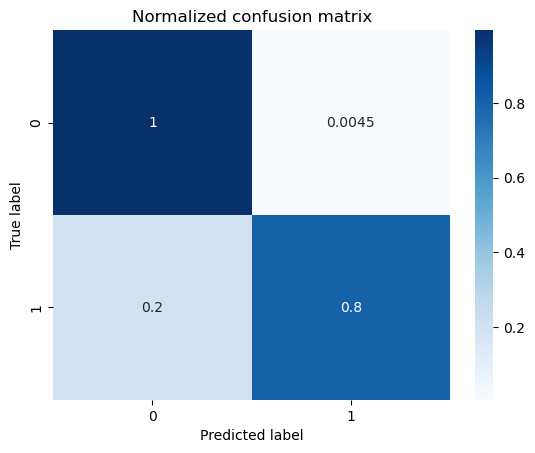

In [56]:
# Xây dựng mô hình với thuật toán Random Forest Classifier
rd_clf = RandomForestClassifier()
rd_clf.fit(train_input, train_output)

y_pred_rd_clf = rd_clf.predict(test_input)

acc_rd_clf = accuracy_score(test_output, y_pred_rd_clf)
conf = confusion_matrix(test_output, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")

# biểu đồ confusion matrix chuẩn hoá
normalized_cnf_matrix = conf/conf.sum(axis = 1, keepdims = True)
sns.heatmap(pd.DataFrame(normalized_cnf_matrix), cmap="Blues", annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized confusion matrix')
plt.show()

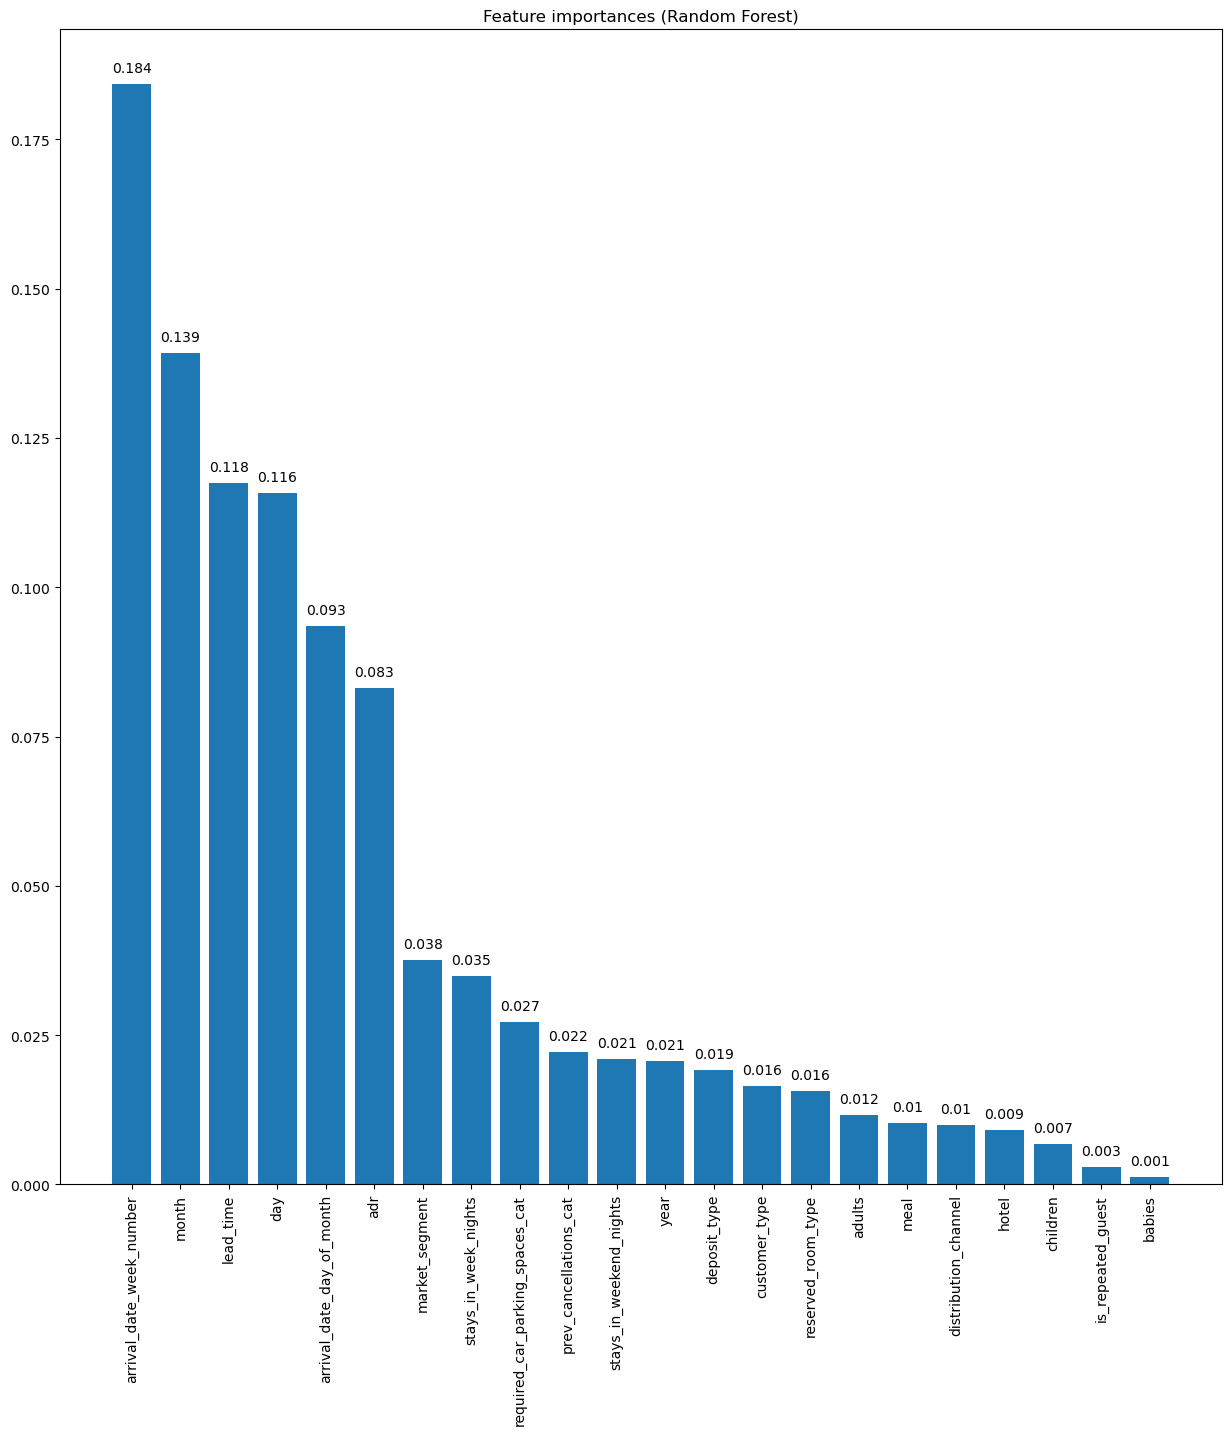

In [57]:
#Lấy ra các thuộc tính quan trọng từ model 
headers = ["name", "score"]
values = sorted(zip(train_input.columns, rd_clf.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = headers)

fig = plt.figure(figsize=(15,15))
x_pos = np.arange(0, len(feature_importances))
plt.bar(x_pos, feature_importances['score'], align='center')
plt.xticks(rotation=90)
plt.xticks(x_pos, feature_importances['name'])
plt.title('Feature importances (Random Forest)')

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.002,y[i].round(decimals=3), ha='center')
addlabels(x_pos, feature_importances['score'])
plt.show()

In [58]:
feature_importances[feature_importances['score'] > 0.01]

name     score
0          arrival_date_week_number  0.184215
1                             month  0.139257
2                         lead_time  0.117509
3                               day  0.115806
4         arrival_date_day_of_month  0.093440
5                               adr  0.083143
6                    market_segment  0.037502
7              stays_in_week_nights  0.034878
8   required_car_parking_spaces_cat  0.027239
9            prev_cancellations_cat  0.022198
10          stays_in_weekend_nights  0.020989
11                             year  0.020598
12                     deposit_type  0.019173
13                    customer_type  0.016461
14               reserved_room_type  0.015628
15                           adults  0.011633
16                             meal  0.010314